In [9]:
import os
import sys

sys.path.append(os.path.join(os.getcwd(), "src"))

import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime
from data_generator import SimpleMultiViewDataGenerator
import wandb
from wandb.integration.keras import WandbMetricsLogger, WandbModelCheckpoint

from models.early_fusion.resnet50_early import build_5_view_resnet50_early
from evaluation import evaluate_model, plot_predictions

In [ ]:
# Set data parameters and paths
data_dir = r"/home/yammo/C:/Users/gianm/Development/multi-view-classification/dataset/test_v1"
input_shape = (224, 224, 3)
batch_size = 8

views = ["back_left", "back_right", "front_left", "front_right", "top"]
class_names = ['real_1', 'real_2', 'real_3', 'real_4', 'real_5', 'thingi10k_32770', 'thingi10k_34785', 'thingi10k_35269', 'thingi10k_36069', 'thingi10k_36082', 'thingi10k_36086', 'thingi10k_36090', 'thingi10k_36372', 'thingi10k_36373', 'thingi10k_37093', 'thingi10k_37266', 'thingi10k_37272', 'thingi10k_37274', 'thingi10k_37275', 'thingi10k_37276', 'thingi10k_37278', 'thingi10k_37280', 'thingi10k_37282', 'thingi10k_37283', 'thingi10k_37284', 'thingi10k_37287', 'thingi10k_37288', 'thingi10k_37322', 'thingi10k_37323', 'thingi10k_37506', 'thingi10k_37620', 'thingi10k_37627', 'thingi10k_37743', 'thingi10k_37745', 'thingi10k_37750', 'thingi10k_37841', 'thingi10k_37865', 'thingi10k_37880', 'thingi10k_37881', 'thingi10k_37886', 'thingi10k_37888', 'thingi10k_37964', 'thingi10k_37967', 'thingi10k_37972', 'thingi10k_37991', 'thingi10k_38290', 'thingi10k_38291', 'thingi10k_38293', 'thingi10k_38294', 'thingi10k_38296', 'thingi10k_38297', 'thingi10k_38636', 'thingi10k_38637', 'thingi10k_38639', 'thingi10k_38640', 'thingi10k_38643', 'thingi10k_38644', 'thingi10k_39050', 'thingi10k_39108', 'thingi10k_39158', 'thingi10k_39159', 'thingi10k_39164', 'thingi10k_39165', 'thingi10k_39180', 'thingi10k_39182', 'thingi10k_39245', 'thingi10k_39295', 'thingi10k_39345', 'thingi10k_39353', 'thingi10k_39358', 'thingi10k_39495', 'thingi10k_39498', 'thingi10k_39499', 'thingi10k_39572', 'thingi10k_39573', 'thingi10k_39636', 'thingi10k_39637', 'thingi10k_39729', 'thingi10k_39730', 'thingi10k_39769']

In [11]:
# Initialize data generator (this will also create train/test splits)
test_gen = SimpleMultiViewDataGenerator(
    data_dir=data_dir,
    views=views,
    input_shape=input_shape,
    batch_size=batch_size,
    test_split=1.0
)

Found 5 complete samples for categories: ['1']


In [12]:
# Get test dataset and class names
test_ds = test_gen.get_test_dataset()

In [13]:
# Compute validation steps:
validation_steps = len(test_gen.test_samples) // batch_size
if len(test_gen.test_samples) % batch_size != 0:
    validation_steps += 1

In [14]:
# Load the saved model
model_path = r"/home/yammo/C:/Users/gianm/Development/multi-view-classification/results/run_20250317-100005/model_best.keras"
model = keras.models.load_model(model_path)

Classification Report:
                 precision    recall  f1-score   support

         real_1       1.00      1.00      1.00         5
         real_2       0.00      0.00      0.00         0
         real_3       0.00      0.00      0.00         0
         real_4       0.00      0.00      0.00         0
         real_5       0.00      0.00      0.00         0
thingi10k_32770       0.00      0.00      0.00         0
thingi10k_34785       0.00      0.00      0.00         0
thingi10k_35269       0.00      0.00      0.00         0
thingi10k_36069       0.00      0.00      0.00         0
thingi10k_36082       0.00      0.00      0.00         0
thingi10k_36086       0.00      0.00      0.00         0
thingi10k_36090       0.00      0.00      0.00         0
thingi10k_36372       0.00      0.00      0.00         0
thingi10k_36373       0.00      0.00      0.00         0
thingi10k_37093       0.00      0.00      0.00         0
thingi10k_37266       0.00      0.00      0.00         0
thingi1

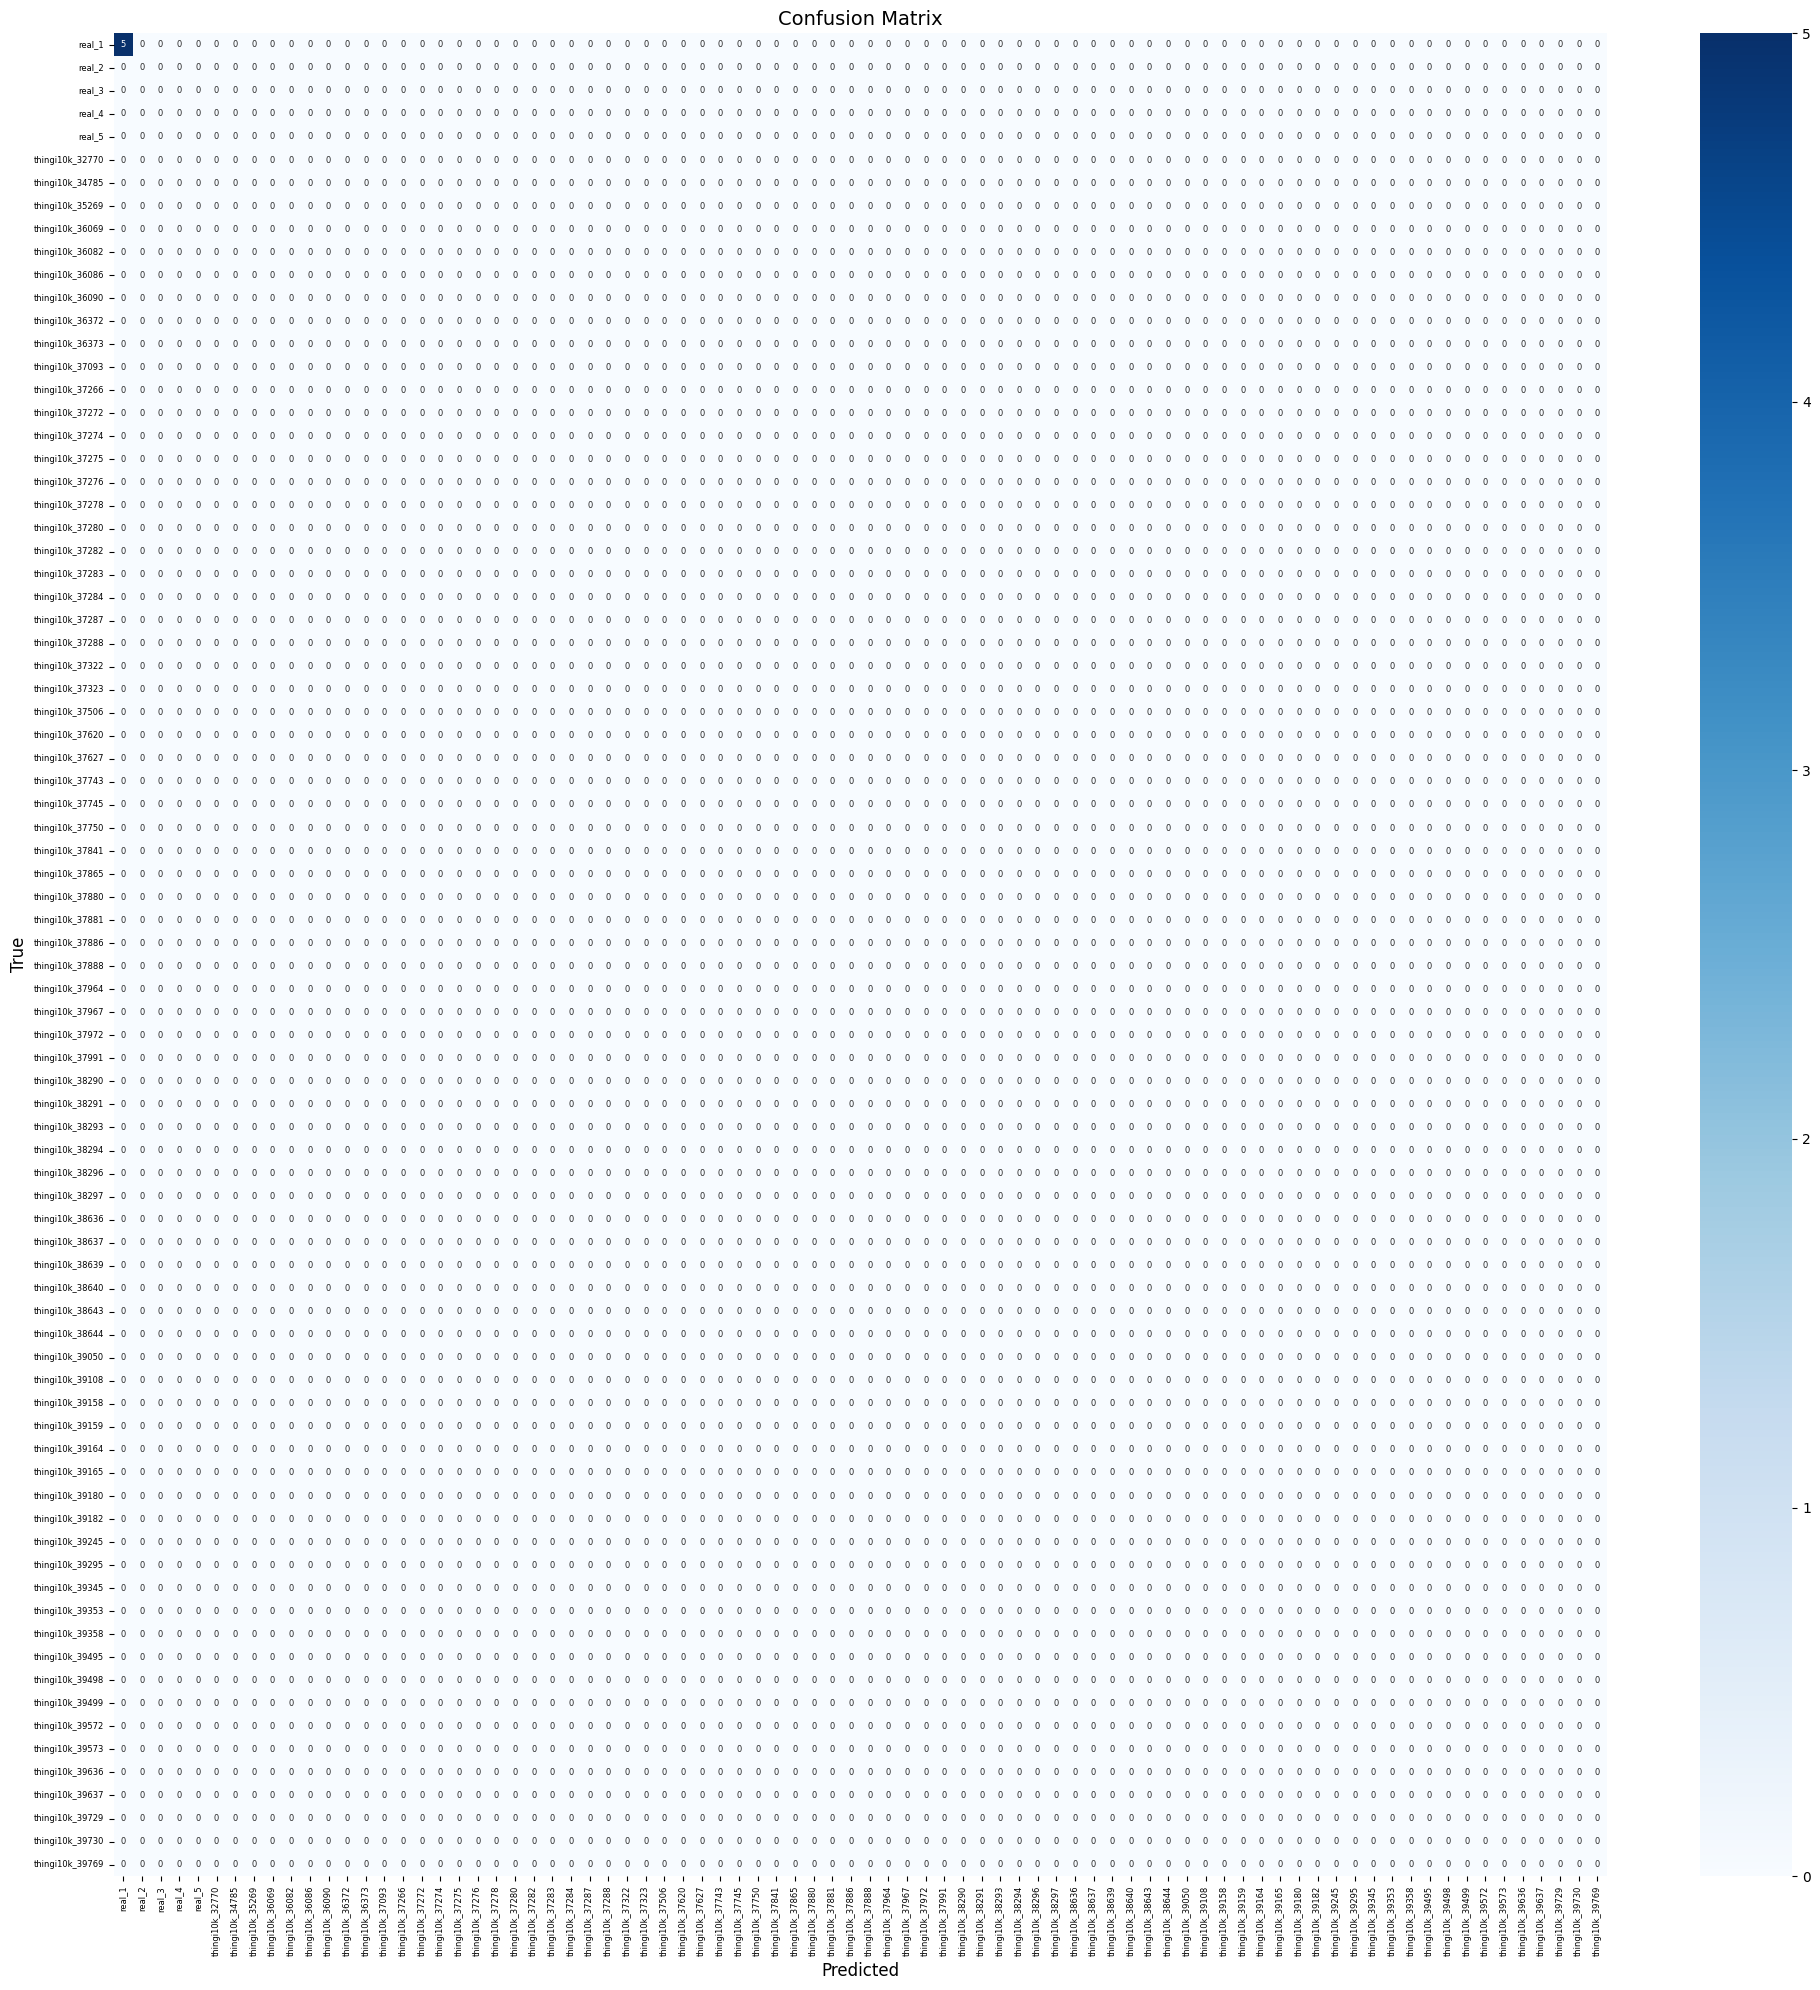

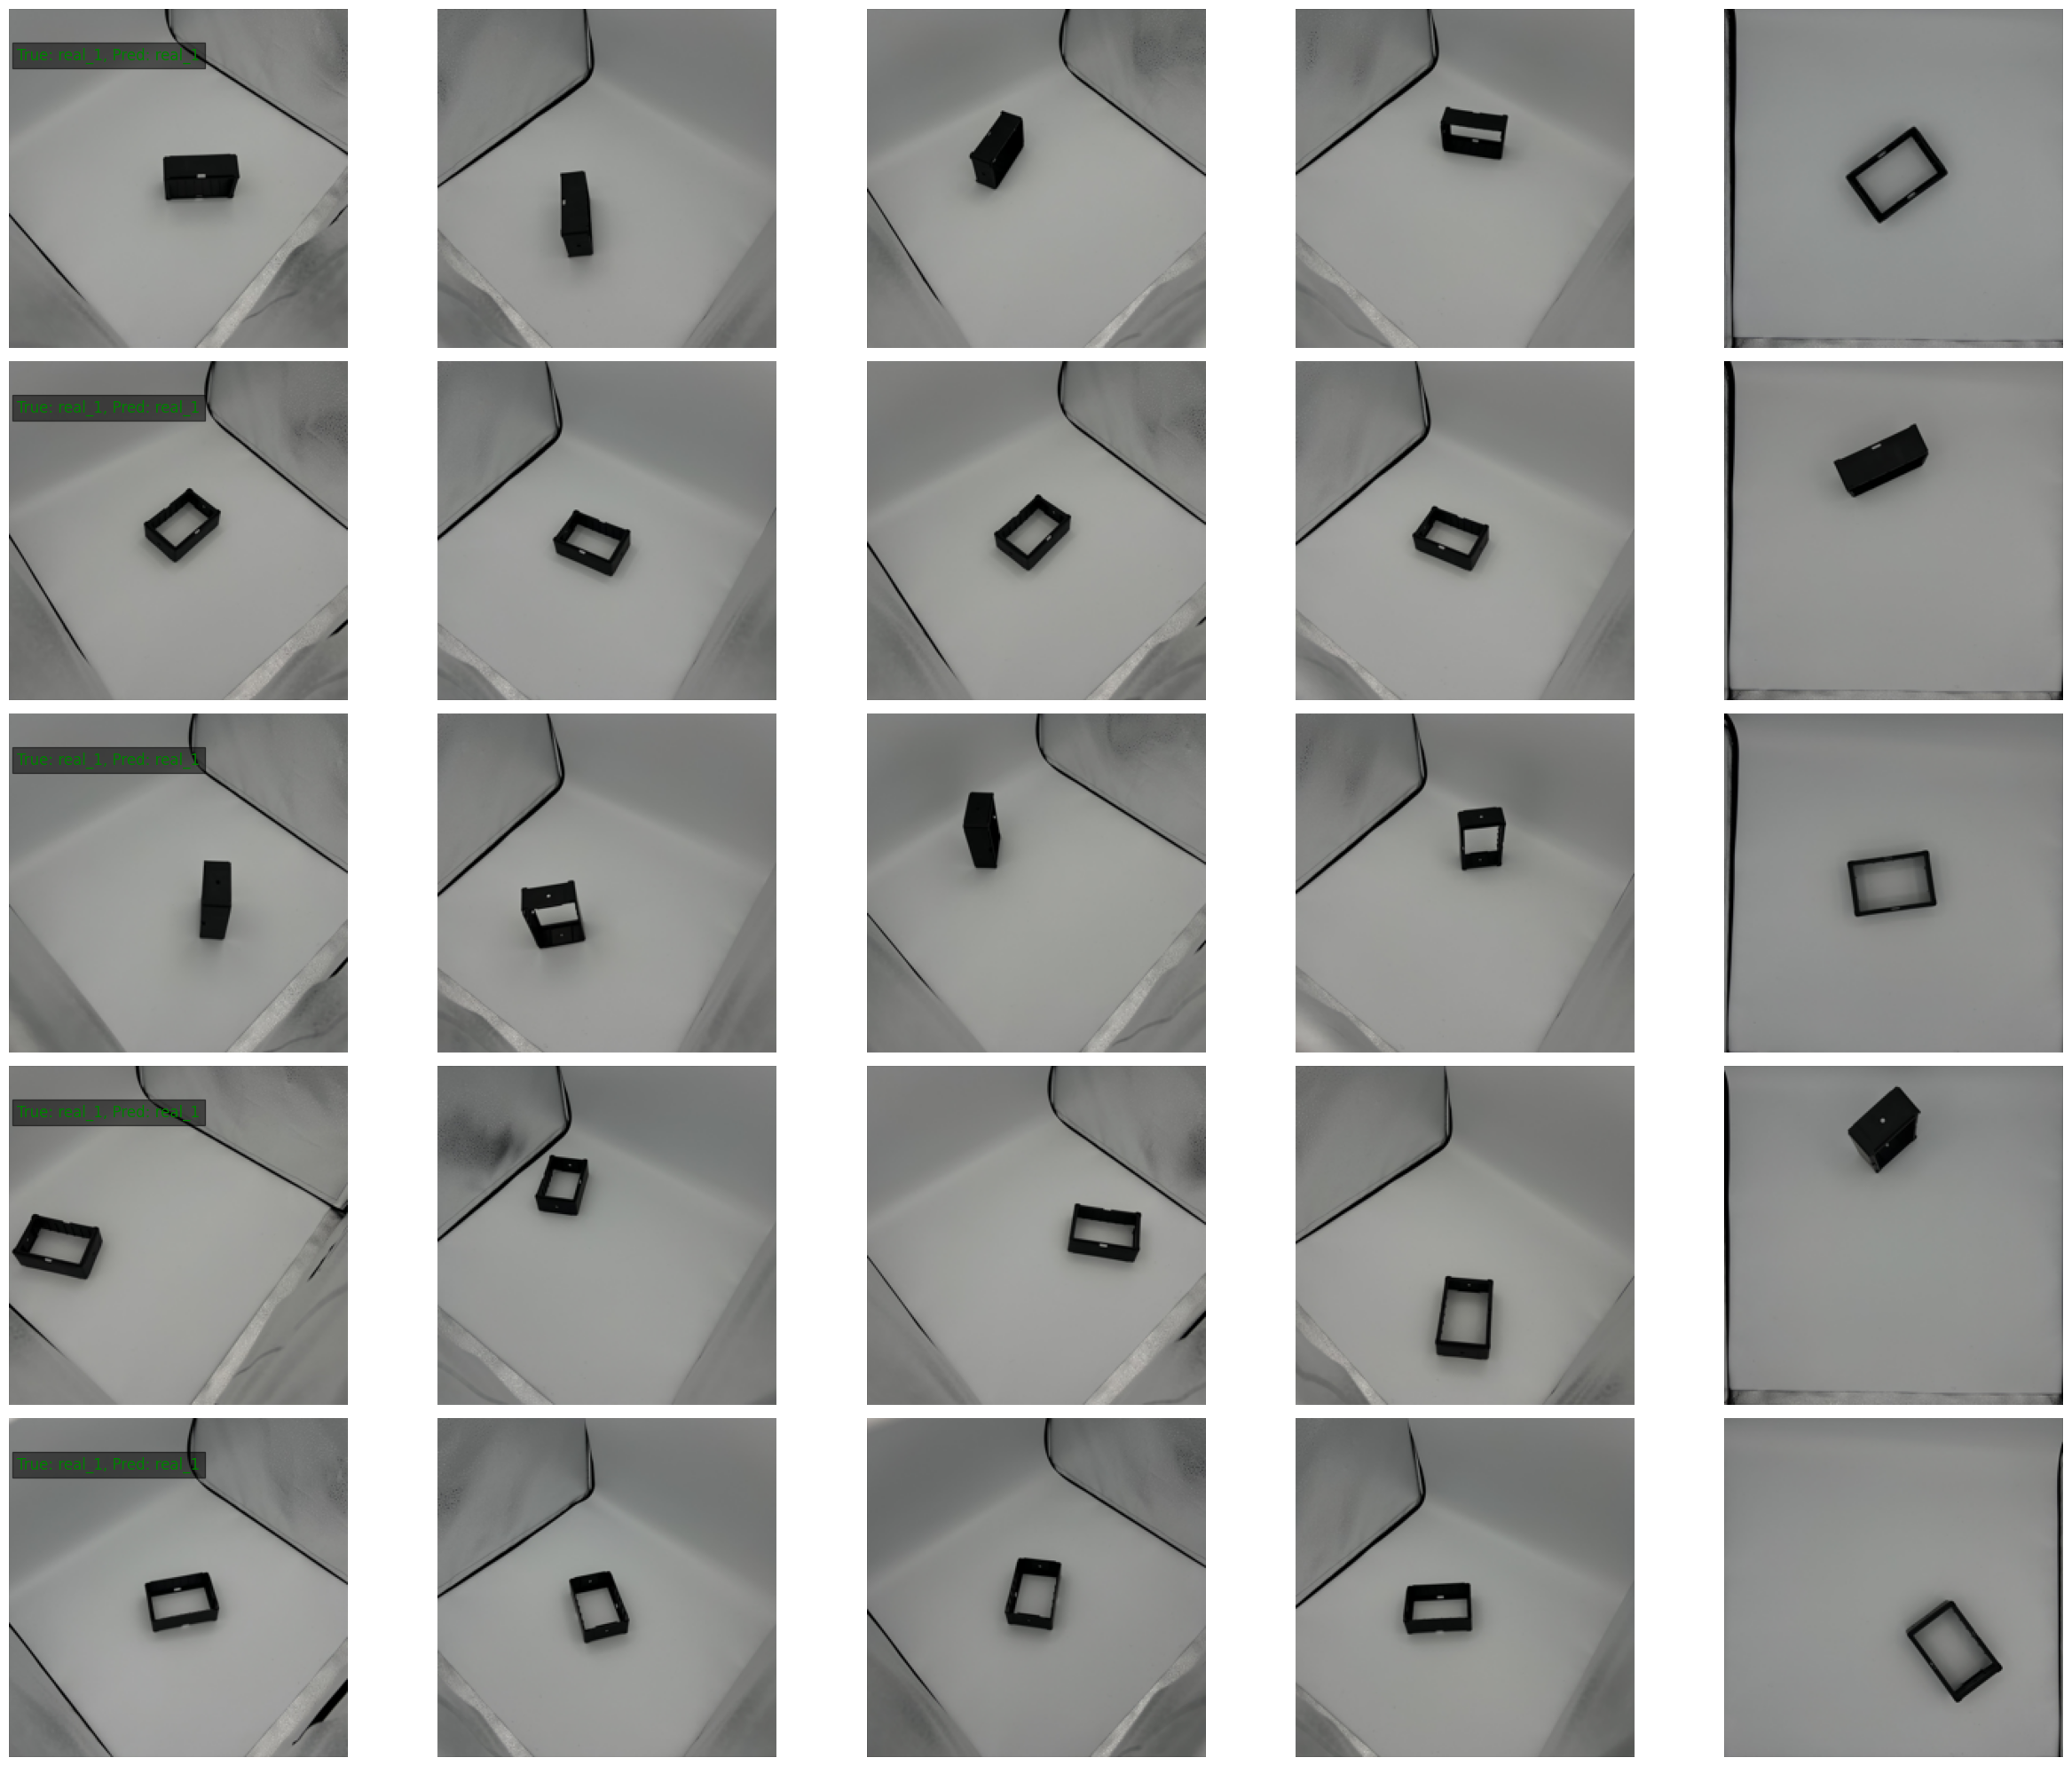

In [ ]:
# Evaluate the model using the helper function
report, cm_fig, y_true, y_pred = evaluate_model(model, test_ds, class_names, validation_steps)

# Optionally, display wrong predictions:
wrong_fig = plot_predictions(model, test_ds, class_names, num_samples=15)